In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [303]:
yelp = pd.read_csv('/Users/salilketkar/thinkful/DS_Unit2/sentiment labelled sentences/yelp_labelled.txt', header=None,delimiter = "\t")
yelp.columns = ['sentence' ,'review']


In [304]:
keywords = ['loved','great','good','amazing','excellent','awesome','love']
for key in keywords:
     yelp[str(key)] = yelp.sentence.str.contains((str(key)), case=False)


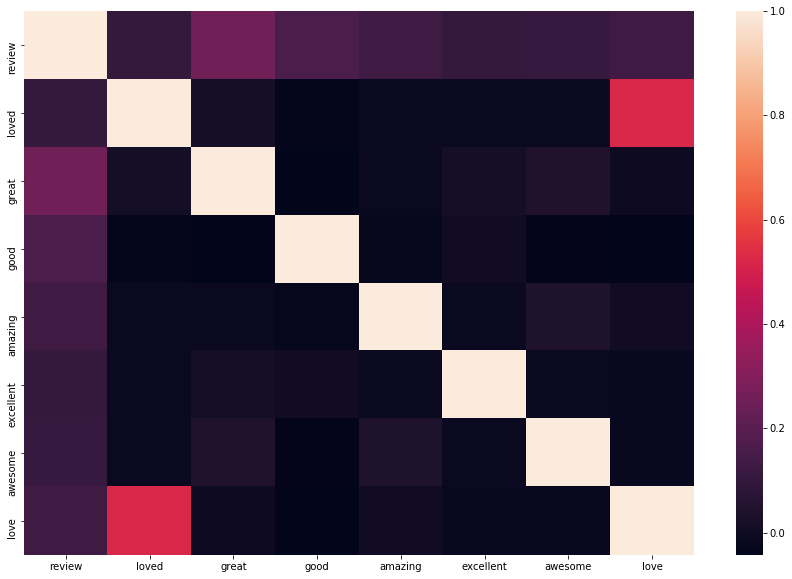

In [305]:
plt.figure(figsize = (15,10))
sns.heatmap(yelp.corr())
plt.show()

In [306]:
data = yelp[keywords]
target = yelp['review']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data,target)

yelp['y_pred'] = bnb.predict(data)

print('Number of mislabeled points out of a total {} points: {}'.format(data.shape[0], (target!= y_pred).sum()))
print('Success rate: = ', (((target==y_pred).sum())/data.shape[0])*100)

Number of mislabeled points out of a total 1000 points: 334
Success rate: =  66.60000000000001


In [307]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[471,  29],
       [305, 195]])

29 type I errors and 305 type II errors.  
sensitivity = 195/500 = 39%
specificity = 471/500 = 94.2%

In [308]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(data,target,test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.675
Testing on Sample: 0.666


In [309]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.65, 0.66, 0.67, 0.71, 0.6 , 0.64, 0.64, 0.7 , 0.65, 0.74])

The variation in cross val score indicates the model is overfitting 

### First iteration

In [373]:
yelp1 = pd.read_csv('/Users/salilketkar/thinkful/DS_Unit2/sentiment labelled sentences/yelp_labelled.txt', header=None,delimiter = "\t")
yelp1.columns = ['sentence' ,'review']

keywords1 = ['loved','great','good','amazing','excellent','awesome','love']
opposites1 = ['hate','bad','disgusting','average','mediocre','terrible']
for key in keywords1:
    for opp in opposites1:
        yelp1[str(key)] = (yelp1.sentence.str.contains(str(key),case=False) & (~yelp1.sentence.str.contains(str(opp),case=False)))

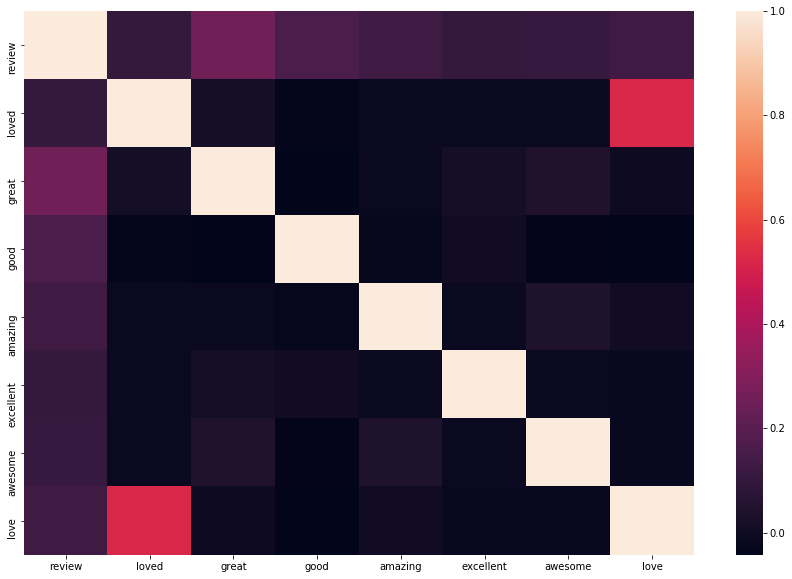

In [374]:
plt.figure(figsize = (15,10))
sns.heatmap(yelp1.corr())
plt.show()

In [375]:
data1 = yelp1[keywords1]
target1 = yelp1['review']

from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB()

bnb1.fit(data1,target1)

yelp1['y_pred'] = bnb1.predict(data1)

print('Number of mislabeled points out of a total {} points: {}'.format(data1.shape[0], (target1!= yelp1['y_pred']).sum()))
print('Success rate: = ', (((target1==yelp1['y_pred']).sum())/data1.shape[0])*100)

Number of mislabeled points out of a total 1000 points: 334
Success rate: =  66.60000000000001


In [377]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target1, yelp1['y_pred']))

print('sensitivity = 39% specificity = 94.2%')

[[471  29]
 [305 195]]
sensitivity = 39% specificity = 94.2%


In [321]:
from sklearn.model_selection import train_test_split

X_train1,X_test1, y_train1, y_test1 = train_test_split(data1,target1,test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train1, y_train1).score(X_test1, y_test1)))
print('Testing on Sample: ' + str(bnb.fit(data1, target1).score(data1, target1)))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb1, data1, target1, cv=10)

With 20% Holdout: 0.665
Testing on Sample: 0.641


array([0.63, 0.63, 0.63, 0.67, 0.59, 0.61, 0.63, 0.68, 0.6 , 0.74])

### Second iteration

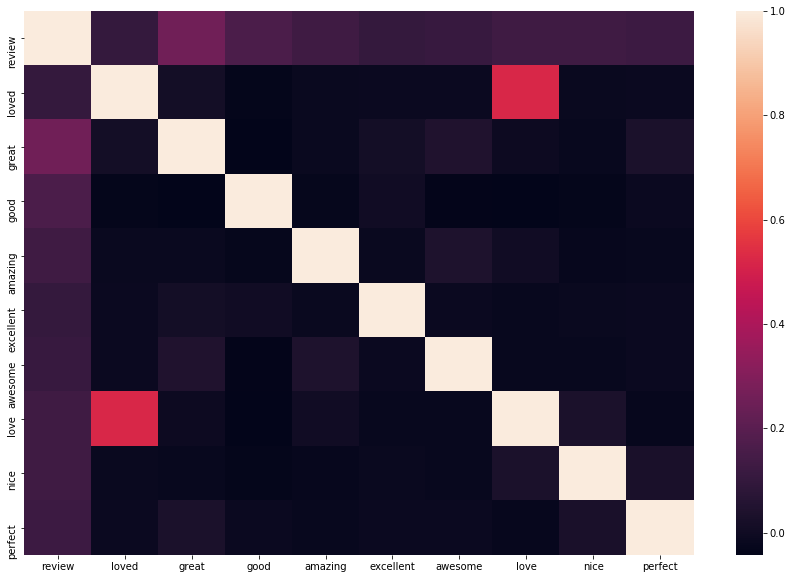

In [369]:
yelp2 = pd.read_csv('/Users/salilketkar/thinkful/DS_Unit2/sentiment labelled sentences/yelp_labelled.txt', header=None,delimiter = "\t")
yelp2.columns = ['sentence' ,'review']

keywords2 = ['loved','great','good','amazing','excellent','awesome','love','nice','perfect',]
opposites2 = ['hate','bad','disgusting','average','mediocre','terrible']
for key in keywords2:
    for opp in opposites2:
        yelp2[str(key)] = (yelp2.sentence.str.contains(str(key),case=False) & (~yelp2.sentence.str.contains(str(opp),case=False)))
        
plt.figure(figsize = (15,10))
sns.heatmap(yelp2.corr())
plt.show()

In [370]:
data2 = yelp2[keywords2]
target2 = yelp2['review']

from sklearn.naive_bayes import BernoulliNB

bnb2 = BernoulliNB()

bnb2.fit(data2,target2)

yelp2['y_pred'] = bnb2.predict(data2)

print('Number of mislabeled points out of a total {} points: {}'.format(data2.shape[0], (target2!= yelp2['y_pred']).sum()))
print('Success rate: = ', (((target2==yelp2['y_pred']).sum())/data2.shape[0])*100)

Number of mislabeled points out of a total 1000 points: 306
Success rate: =  69.39999999999999


In [372]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(target2, yelp2['y_pred']))
print('sensitivity = 45.2% specificity = 93.6%')

from sklearn.model_selection import train_test_split

X_train2,X_test2, y_train2, y_test2 = train_test_split(data2,target2,test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb2.fit(X_train2, y_train2).score(X_test2, y_test2)))
print('Testing on Sample: ' + str(bnb2.fit(data2, target2).score(data2, target2)))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb2, data2, target2, cv=10)

[[468  32]
 [274 226]]
sensitivity = 45.2% specificity = 93.6%
With 20% Holdout: 0.7
Testing on Sample: 0.694


array([0.67, 0.68, 0.67, 0.72, 0.65, 0.67, 0.68, 0.72, 0.72, 0.76])

### Third Iteration

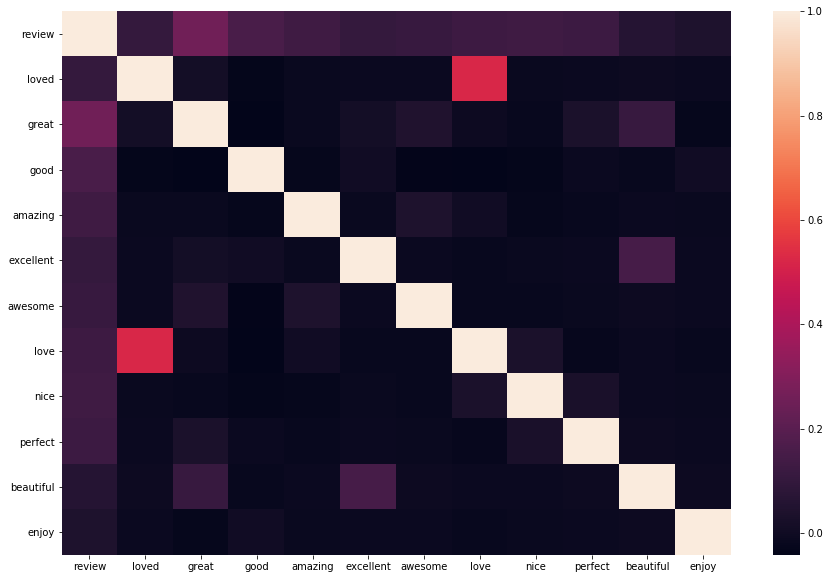

In [365]:
yelp3 = pd.read_csv('/Users/salilketkar/thinkful/DS_Unit2/sentiment labelled sentences/yelp_labelled.txt', header=None,delimiter = "\t")
yelp3.columns = ['sentence' ,'review']

keywords3 = ['loved','great','good','amazing','excellent','awesome','love','nice','perfect','beautiful','enjoy']
opposites3 = ['hate','bad','disgusting','average','mediocre','terrible','rude','did not']
for key in keywords3:
    for opp in opposites3:
        yelp3[str(key)] = (yelp3.sentence.str.contains(str(key),case=False) & (~yelp3.sentence.str.contains(str(opp),case=False)))
        
plt.figure(figsize = (15,10))
sns.heatmap(yelp3.corr())
plt.show()

In [366]:
data3 = yelp3[keywords3]
target3 = yelp3['review']

from sklearn.naive_bayes import BernoulliNB

bnb3 = BernoulliNB()

bnb3.fit(data3,target3)

yelp3['y_pred'] = bnb3.predict(data3)

print('Number of mislabeled points out of a total {} points: {}'.format(data3.shape[0], (target3!= yelp3['y_pred']).sum()))
print('Success rate: = ', (((target3==yelp3['y_pred']).sum())/data3.shape[0])*100)

Number of mislabeled points out of a total 1000 points: 302
Success rate: =  69.8


In [368]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target3, yelp3['y_pred']))
print('sensitivity = 46.6% specificity = 93%')
from sklearn.model_selection import train_test_split

X_train3,X_test3, y_train3, y_test3 = train_test_split(data3,target3,test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb3.fit(X_train3, y_train3).score(X_test3, y_test3)))
print('Testing on Sample: ' + str(bnb3.fit(data3, target3).score(data3, target3)))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb3, data3, target3, cv=10)

[[465  35]
 [267 233]]
sensitivity = 46.6% specificity = 93%
With 20% Holdout: 0.7
Testing on Sample: 0.698


array([0.67, 0.68, 0.66, 0.71, 0.66, 0.68, 0.68, 0.72, 0.73, 0.76])

### Fourth Iteration

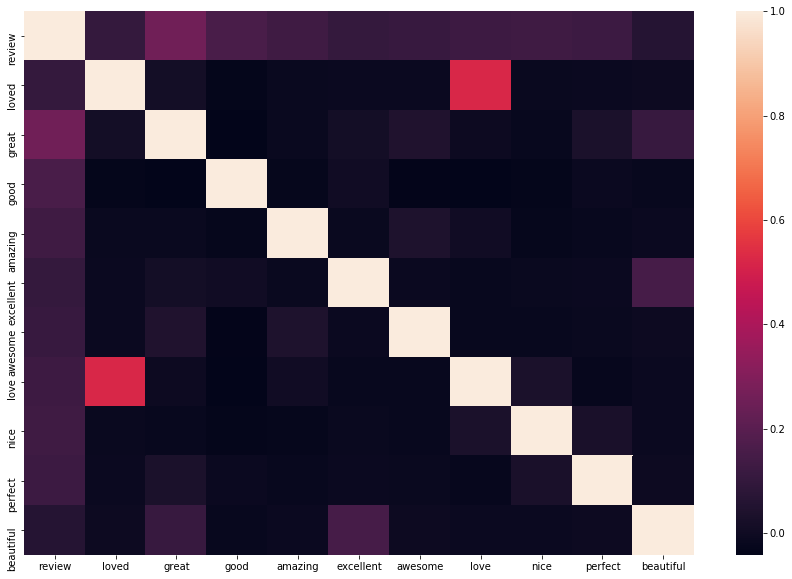

In [361]:
yelp4 = pd.read_csv('/Users/salilketkar/thinkful/DS_Unit2/sentiment labelled sentences/yelp_labelled.txt', header=None,delimiter = "\t")
yelp4.columns = ['sentence' ,'review']

keywords4 = ['loved','great','good','amazing','excellent','awesome','love','nice','perfect','beautiful']
opposites4 = ['hate','bad','disgusting','average','mediocre','terrible','rude','did not']
for key in keywords4:
    for opp in opposites4:
        yelp4[str(key)] = (yelp4.sentence.str.contains(str(key), case=False) & (~yelp4.sentence.str.contains(str(opp), case=False)))
        
plt.figure(figsize = (15,10))
sns.heatmap(yelp4.corr())
plt.show()

In [385]:
data4 = yelp4[keywords4]
target4 = yelp4['review']

from sklearn.naive_bayes import BernoulliNB

bnb4 = BernoulliNB()

bnb4.fit(data4,target4)

yelp4['y_pred'] = bnb4.predict(data4)

print('Number of mislabeled points out of a total {} points: {}'.format(data4.shape[0], (target4!= yelp4['y_pred']).sum()))
print('Success rate: = ', (((target4==yelp4['y_pred']).sum())/data4.shape[0])*100)

Number of mislabeled points out of a total 1000 points: 305
Success rate: =  69.5


In [364]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target4, yelp4['y_pred']))
print('sensitivity = 45.4% specificity = 93.6%')

from sklearn.model_selection import train_test_split

X_train4,X_test4, y_train4, y_test4 = train_test_split(data4,target4,test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb4.fit(X_train4, y_train4).score(X_test4, y_test4)))
print('Testing on Sample: ' + str(bnb4.fit(data4, target4).score(data4, target4)))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb4, data4, target4, cv=10)

[[468  32]
 [273 227]]
sensitivity = 45.4% specificity = 93.6%
With 20% Holdout: 0.7
Testing on Sample: 0.695


array([0.68, 0.68, 0.67, 0.71, 0.65, 0.68, 0.68, 0.72, 0.72, 0.76])

### Fifth Iteration

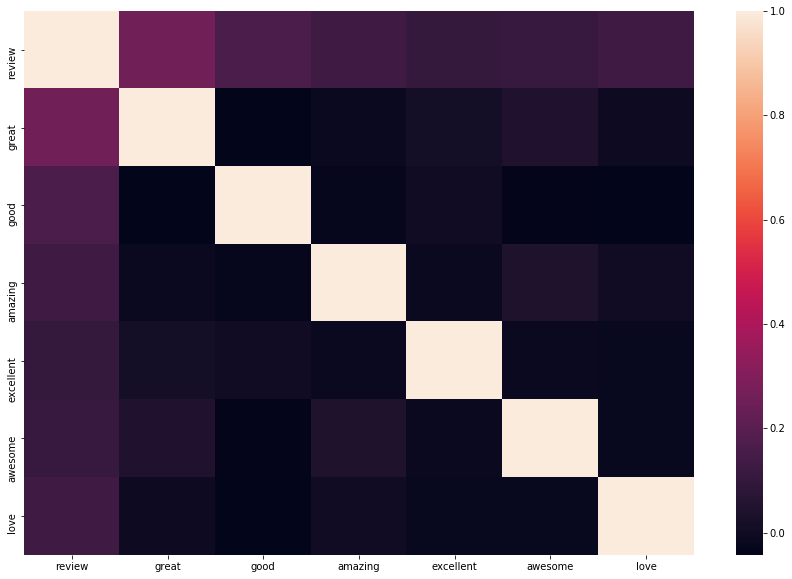

In [387]:
yelp5 = pd.read_csv('/Users/salilketkar/thinkful/DS_Unit2/sentiment labelled sentences/yelp_labelled.txt', header=None,delimiter = "\t")
yelp5.columns = ['sentence' ,'review']

keywords5 = ['great','good','amazing','excellent','awesome','love']
for key in keywords5:
    yelp5[str(key)] = yelp5.sentence.str.contains(str(key), case=False)
        
plt.figure(figsize = (15,10))
sns.heatmap(yelp5.corr())
plt.show()

In [388]:
data5 = yelp5[keywords5]
target5 = yelp5['review']

from sklearn.naive_bayes import BernoulliNB

bnb5 = BernoulliNB()

bnb5.fit(data5,target5)

yelp5['y_pred'] = bnb5.predict(data5)

print('Number of mislabeled points out of a total {} points: {}'.format(data5.shape[0], (target5!= yelp5['y_pred']).sum()))
print('Success rate: = ', (((target5==yelp5['y_pred']).sum())/data5.shape[0])*100)

Number of mislabeled points out of a total 1000 points: 334
Success rate: =  66.60000000000001


In [389]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target5, yelp5['y_pred']))
print('sensitivity = 45.4% specificity = 94.2%')

from sklearn.model_selection import train_test_split

X_train5,X_test5, y_train5, y_test5 = train_test_split(data5,target5,test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb5.fit(X_train5, y_train5).score(X_test5, y_test5)))
print('Testing on Sample: ' + str(bnb5.fit(data5, target5).score(data5, target5)))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data5, target5, cv=10)

[[471  29]
 [305 195]]
sensitivity = 45.4% specificity = 94.2%
With 20% Holdout: 0.675
Testing on Sample: 0.666


array([0.65, 0.66, 0.67, 0.71, 0.6 , 0.64, 0.64, 0.7 , 0.65, 0.74])

All five iterations seem to overfit.  This is indicated by the variation in the cross validation scores.  The addition of the 'opposite' raised the overall accuracy.  From looking at only the success rate, the third iteration performed the best.  The third iteration had the best sensitivity and the first and fifth iteration had the highest specificity.  I would say the third iteration performed the best out of all five.  The model was not good at prediciting positive reviews and this was improved in the third iteration.  Still more work can be done to reduce the overfitting.  